In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_spss('CCAM SPSS Data 2008-2022.sav')
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.269626,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,...,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.424411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,...,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.244660,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.144799,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,...,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.644106,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,Working - as a paid employee,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household


In [3]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [49]:
df['happening']

0               Yes
1        Don't know
2        Don't know
3               Yes
4               Yes
            ...    
30131    Don't know
30132           Yes
30133           Yes
30134            No
30135           Yes
Name: happening, Length: 30136, dtype: category
Categories (4, object): ['Don't know', 'No', 'Refused', 'Yes']

In [4]:
df=df.fillna('Not Asked')

TypeError: Cannot setitem on a Categorical with a new category (Not Asked), set the categories first

In [9]:
# standardize=[ 'cause_recoded', 'sci_consensus',
#        'worry', 'when_harm_US',
#             'reg_CO2_pollutant', 'reg_utilities', 'fund_research', 'reg_coal_emissions', 'discuss_GW',
#             'hear_GW_media', 'gender', 'age_category', 'generation', 'educ_category', 'income_category',
#             'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo', 'registered_voter', 'region9',
#             'region4', 'religion',  'evangelical', 'service_attendance',
#             'marit_status', 'employment', 'house_head', 'house_type', 'house_own']
# df['evangelical'] = df['evangelical'].apply(lambda x: "Don't Know" if isinstance(x, float) else x)
# df_encoded = pd.get_dummies(df, columns=standardize).copy()
# df_encoded.drop(columns=['age', 'educ', 'income'],inplace=True)


In [16]:
categorical_columns = df.select_dtypes(['object', 'category']).columns

# Convert the identified columns to the categorical data type
df[categorical_columns] = df[categorical_columns].astype('category')

In [10]:
na_counts = df.isna().sum()
print(na_counts)


case_ID                            0
wave                               0
year                               0
weight_wave                        0
weight_aggregate                   0
happening                          0
cause_original                     0
cause_other_text                   0
cause_recoded                      0
sci_consensus                   1330
worry                              0
harm_personally                    0
harm_US                            0
harm_dev_countries                 0
harm_future_gen                    0
harm_plants_animals             1330
when_harm_US                       0
reg_CO2_pollutant               1010
reg_utilities                   9123
fund_research                      0
reg_coal_emissions             14490
discuss_GW                         0
hear_GW_media                  13657
gender                             0
age                                0
age_category                       0
generation                         0
e

Accuracy for year 2008: 79.43%
Permutation Feature Importances for year 2008:
          Feature  Importance
2           worry    0.081859
1   sci_consensus    0.078242
0   cause_recoded    0.076697
3    when_harm_US    0.074740
16         income    0.034957
8      discuss_GW    0.031645
22   party_x_ideo    0.029037
24        region9    0.028586
14           educ    0.027651
27    evangelical    0.027269



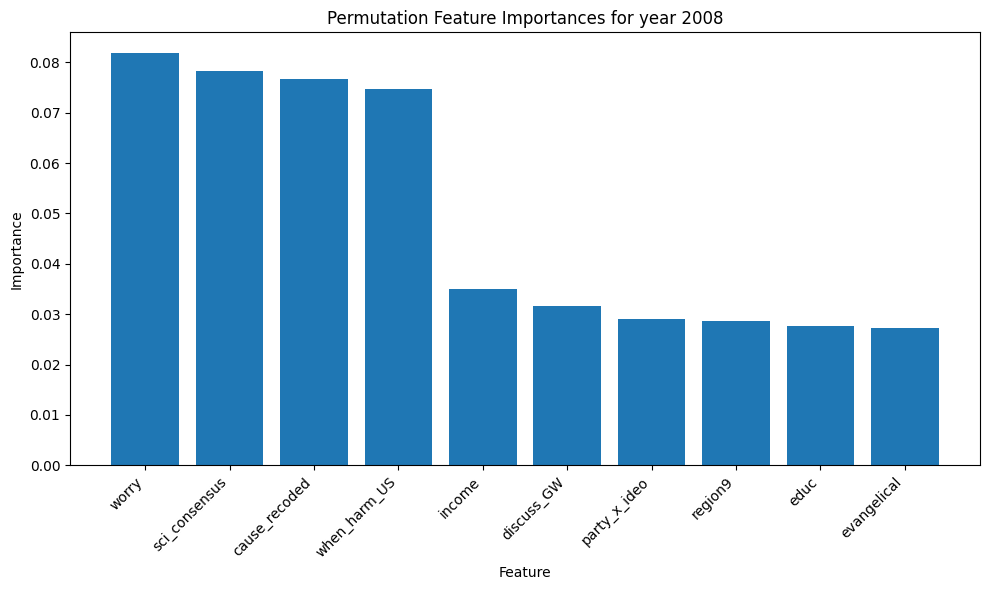

Accuracy for year 2010: 71.88%
Permutation Feature Importances for year 2010:
           Feature  Importance
3     when_harm_US    0.124978
1    sci_consensus    0.085706
0    cause_recoded    0.052275
2            worry    0.048163
16          income    0.039973
33  house_ages0to1    0.037671
14            educ    0.035352
24         region9    0.029118
22    party_x_ideo    0.028526
18            race    0.026513



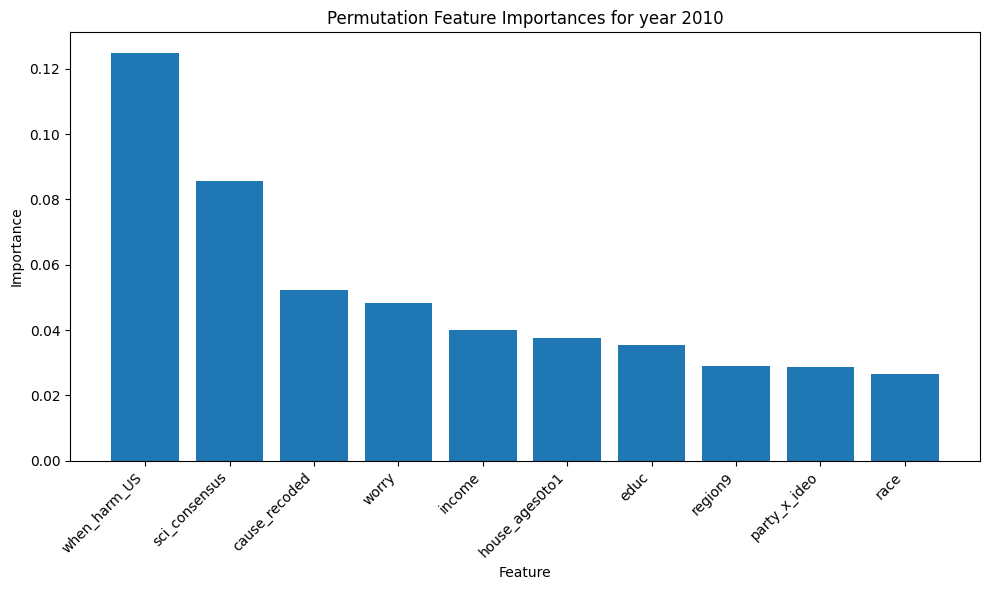

Accuracy for year 2011: 78.20%
Permutation Feature Importances for year 2011:
          Feature  Importance
3    when_harm_US    0.116284
1   sci_consensus    0.081626
0   cause_recoded    0.056978
8      discuss_GW    0.047675
2           worry    0.046828
16         income    0.040590
6   fund_research    0.031921
14           educ    0.028977
22   party_x_ideo    0.028431
38     house_type    0.026780



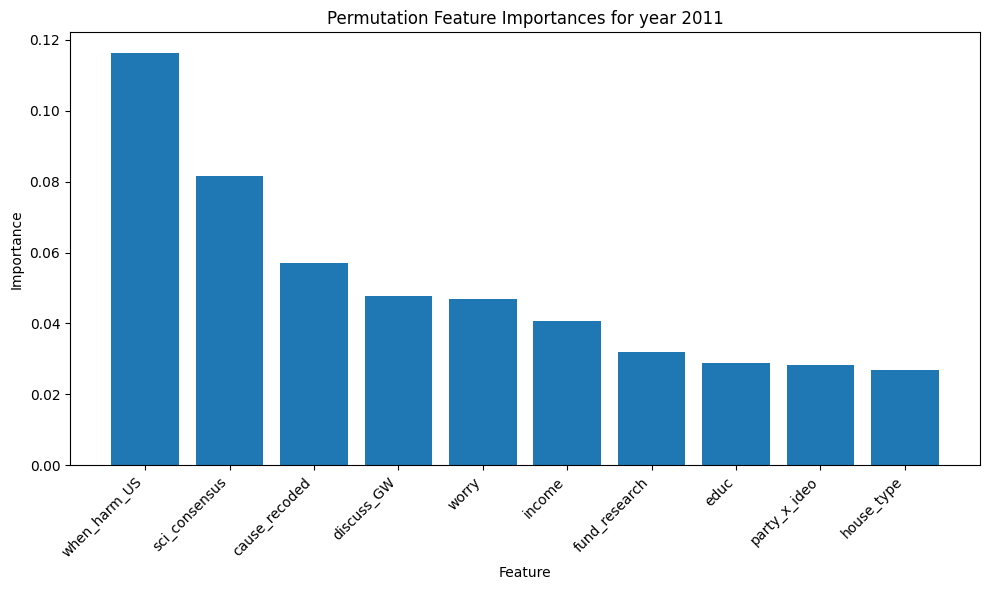

Accuracy for year 2012: 73.20%
Permutation Feature Importances for year 2012:
           Feature  Importance
2            worry    0.106083
1    sci_consensus    0.080450
3     when_harm_US    0.075504
33  house_ages0to1    0.045200
0    cause_recoded    0.044842
8       discuss_GW    0.038467
16          income    0.037558
14            educ    0.028426
5    reg_utilities    0.026830
22    party_x_ideo    0.025628



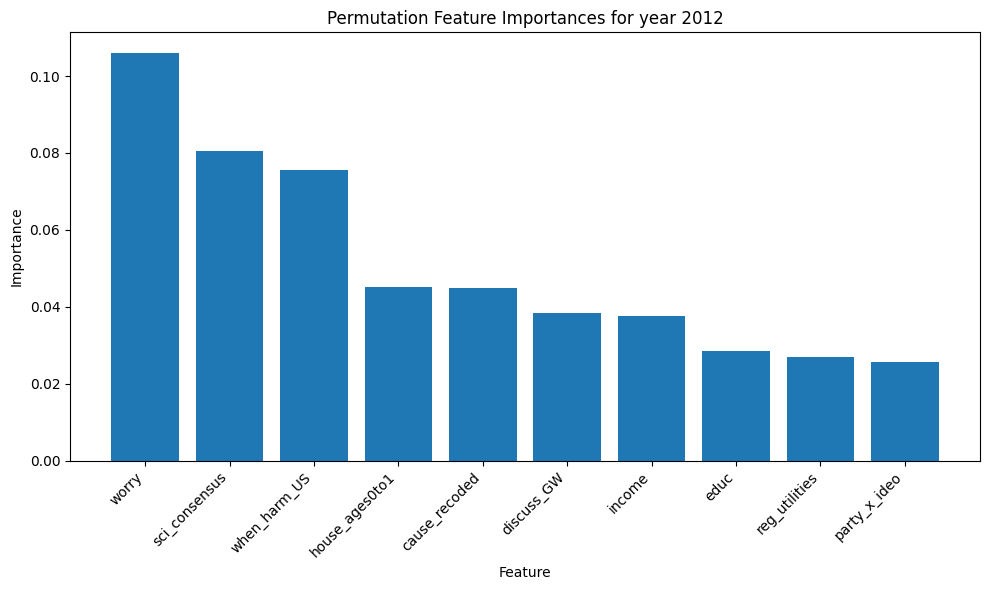

Accuracy for year 2013: 74.01%
Permutation Feature Importances for year 2013:
              Feature  Importance
3        when_harm_US    0.128607
2               worry    0.079335
1       sci_consensus    0.073987
0       cause_recoded    0.045589
18               race    0.036654
16             income    0.035744
23   registered_voter    0.032408
4   reg_CO2_pollutant    0.031459
33     house_ages0to1    0.028516
14               educ    0.028151



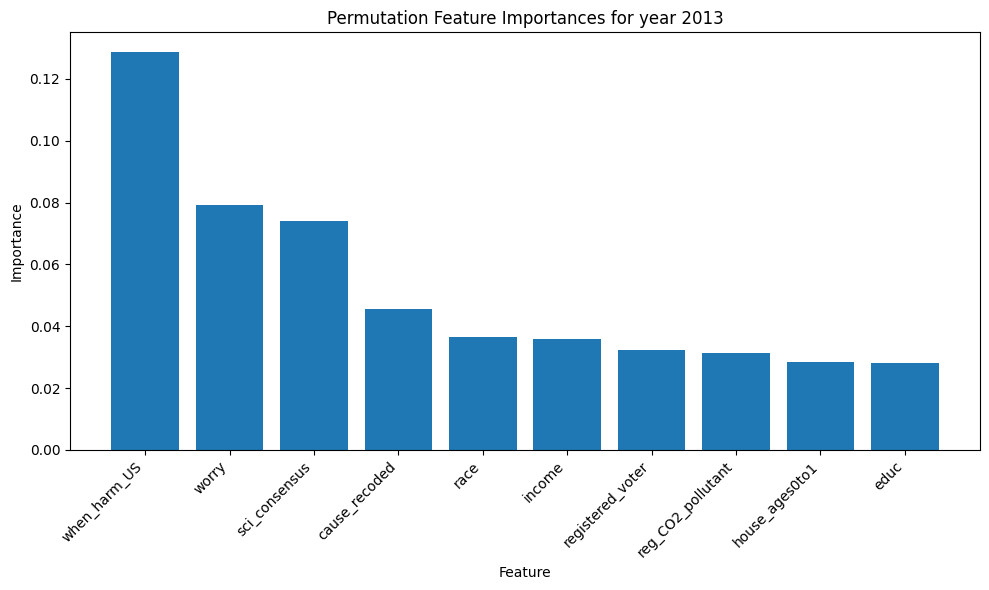

Accuracy for year 2014: 71.22%
Permutation Feature Importances for year 2014:
             Feature  Importance
2              worry    0.115208
1      sci_consensus    0.093581
3       when_harm_US    0.083259
0      cause_recoded    0.043802
23  registered_voter    0.040695
22      party_x_ideo    0.034482
21   party_w_leaners    0.030435
16            income    0.030168
6      fund_research    0.027219
12      age_category    0.023431



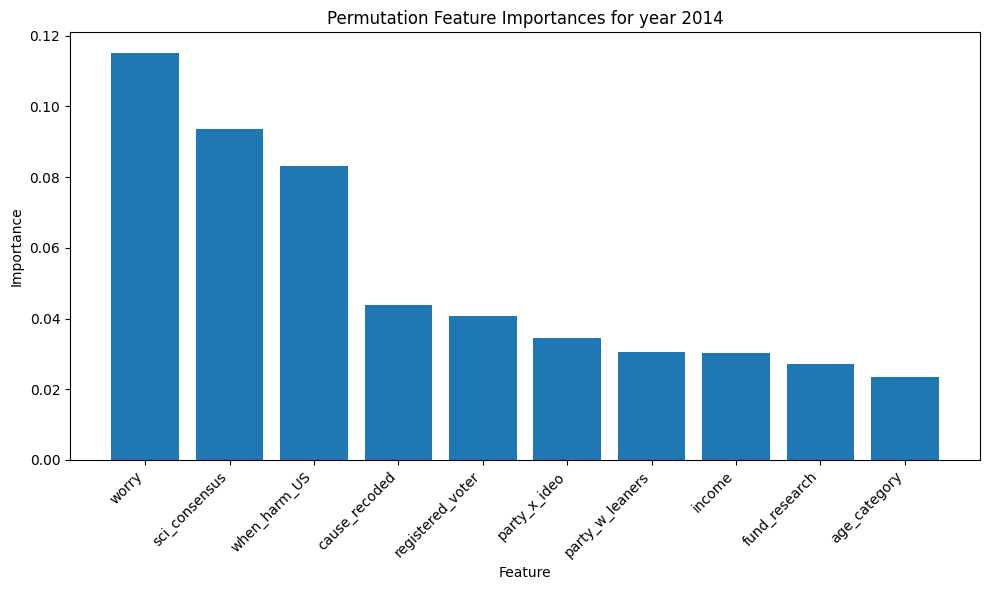

Accuracy for year 2015: 74.38%
Permutation Feature Importances for year 2015:
           Feature  Importance
3     when_harm_US    0.129833
2            worry    0.074519
0    cause_recoded    0.051568
8       discuss_GW    0.038937
1    sci_consensus    0.034359
27     evangelical    0.032284
16          income    0.030588
34  house_ages2to5    0.027396
33  house_ages0to1    0.027366
22    party_x_ideo    0.027177



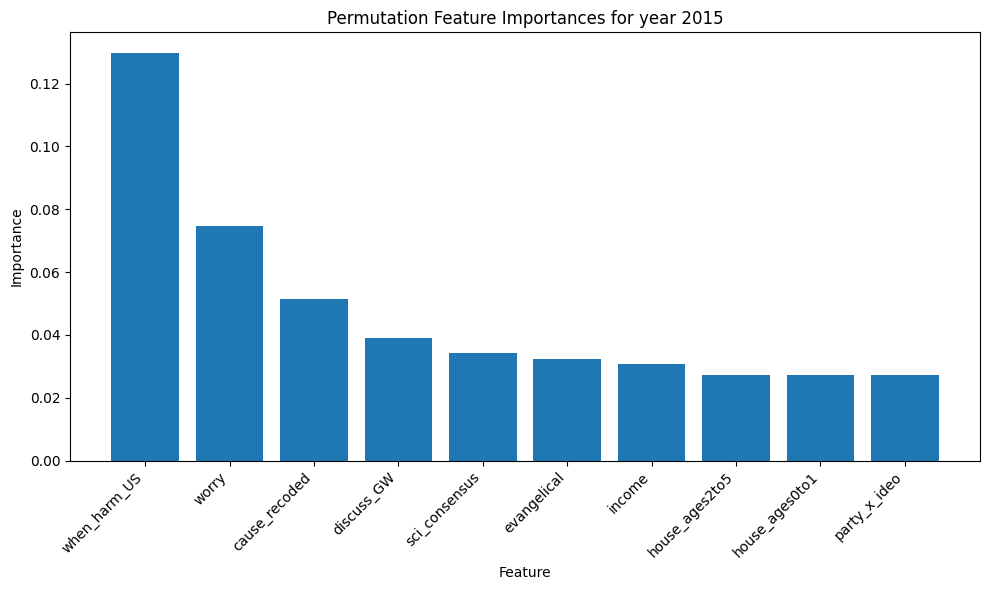

Accuracy for year 2016: 77.93%
Permutation Feature Importances for year 2016:
             Feature  Importance
3       when_harm_US    0.104035
1      sci_consensus    0.095439
2              worry    0.069704
0      cause_recoded    0.052630
23  registered_voter    0.035380
16            income    0.035365
20             party    0.031450
8         discuss_GW    0.029950
14              educ    0.025756
26          religion    0.025587



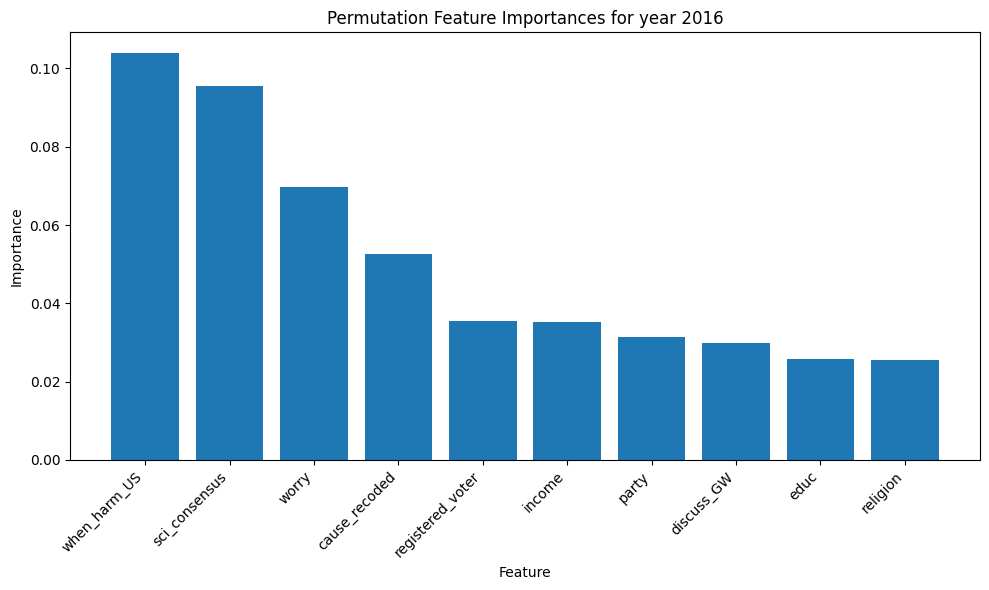

Accuracy for year 2017: 80.92%
Permutation Feature Importances for year 2017:
             Feature  Importance
2              worry    0.131329
1      sci_consensus    0.084892
3       when_harm_US    0.077663
0      cause_recoded    0.040560
16            income    0.034087
23  registered_voter    0.026803
8         discuss_GW    0.025277
18              race    0.024527
9      hear_GW_media    0.024273
12      age_category    0.022706



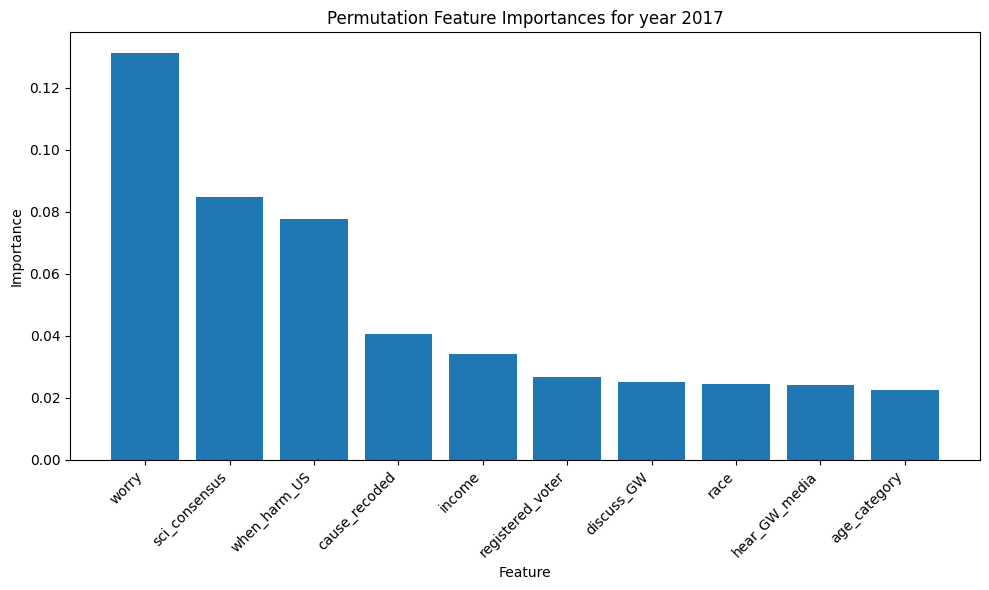

Accuracy for year 2018: 80.73%
Permutation Feature Importances for year 2018:
             Feature  Importance
2              worry    0.137769
1      sci_consensus    0.076821
3       when_harm_US    0.072103
0      cause_recoded    0.049651
27       evangelical    0.037064
6      fund_research    0.035377
16            income    0.033483
23  registered_voter    0.030949
22      party_x_ideo    0.028345
9      hear_GW_media    0.027771



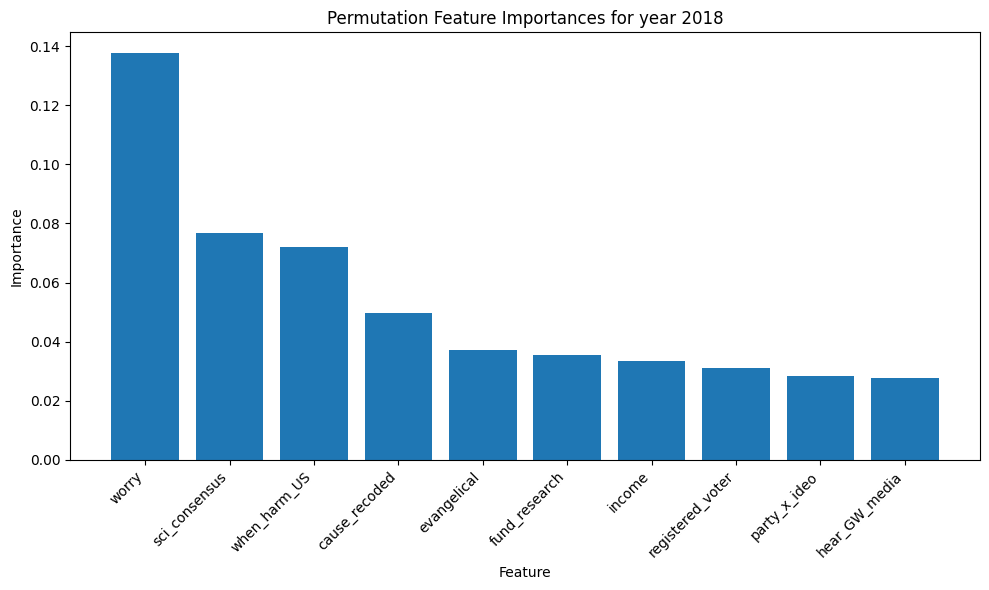

Accuracy for year 2019: 81.99%
Permutation Feature Importances for year 2019:
          Feature  Importance
2           worry    0.150552
3    when_harm_US    0.083607
1   sci_consensus    0.083048
0   cause_recoded    0.044357
16         income    0.029977
6   fund_research    0.027603
26       religion    0.024115
9   hear_GW_media    0.023851
8      discuss_GW    0.022874
14           educ    0.022708



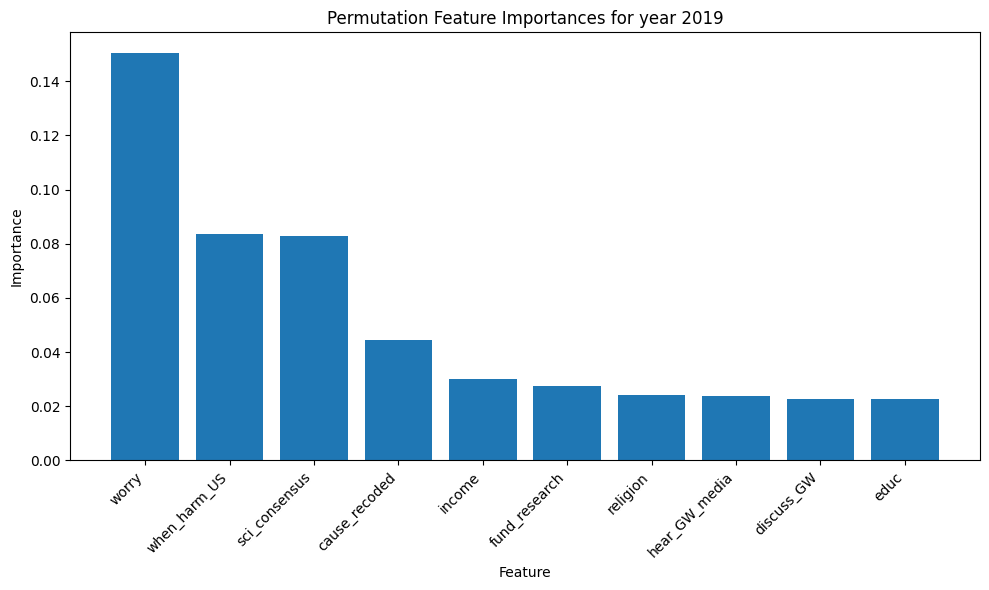

Accuracy for year 2020: 78.63%
Permutation Feature Importances for year 2020:
             Feature  Importance
2              worry    0.114207
1      sci_consensus    0.106524
0      cause_recoded    0.061807
3       when_harm_US    0.059654
33    house_ages0to1    0.044346
23  registered_voter    0.038266
16            income    0.033788
34    house_ages2to5    0.032065
8         discuss_GW    0.026393
14              educ    0.025037



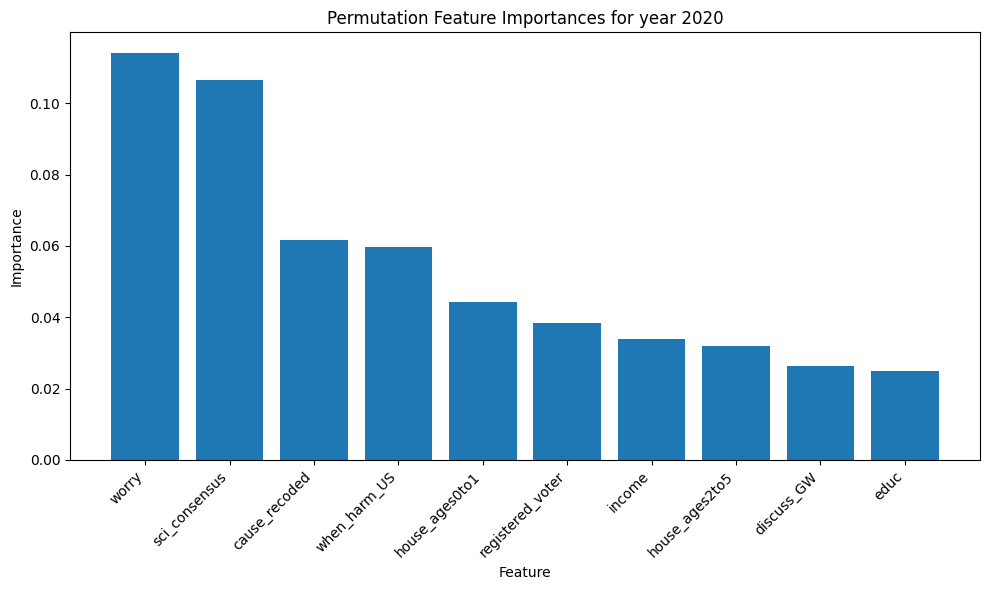

Accuracy for year 2021: 81.79%
Permutation Feature Importances for year 2021:
             Feature  Importance
2              worry    0.173287
3       when_harm_US    0.090931
1      sci_consensus    0.077165
0      cause_recoded    0.057865
23  registered_voter    0.039992
6      fund_research    0.035939
16            income    0.035789
14              educ    0.029747
22      party_x_ideo    0.029169
21   party_w_leaners    0.027824



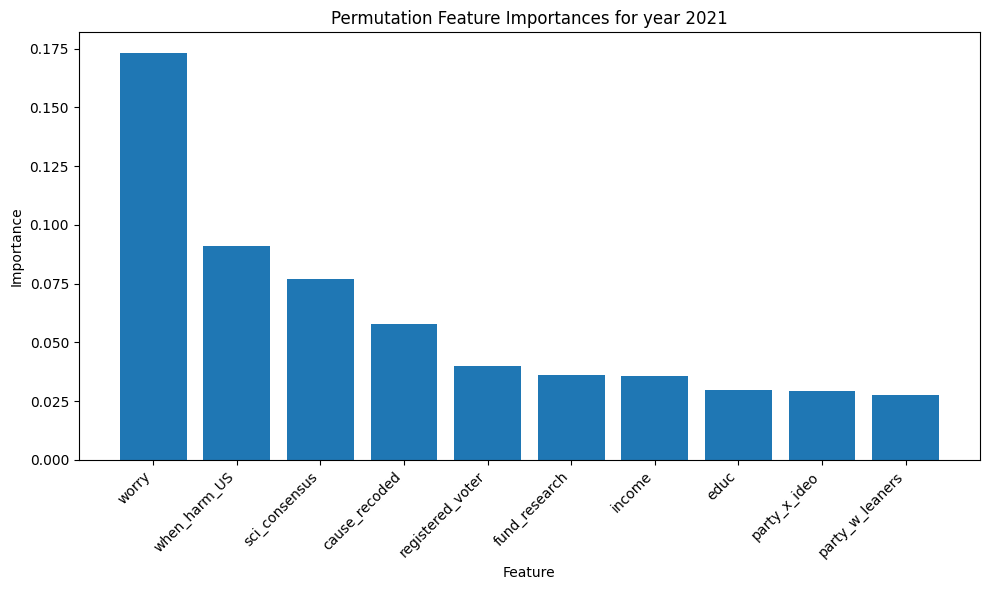

Accuracy for year 2022: 79.47%
Permutation Feature Importances for year 2022:
          Feature  Importance
2           worry    0.130477
1   sci_consensus    0.114671
3    when_harm_US    0.108089
16         income    0.046069
0   cause_recoded    0.041459
26       religion    0.035013
22   party_x_ideo    0.034941
6   fund_research    0.034393
18           race    0.034109
9   hear_GW_media    0.028079



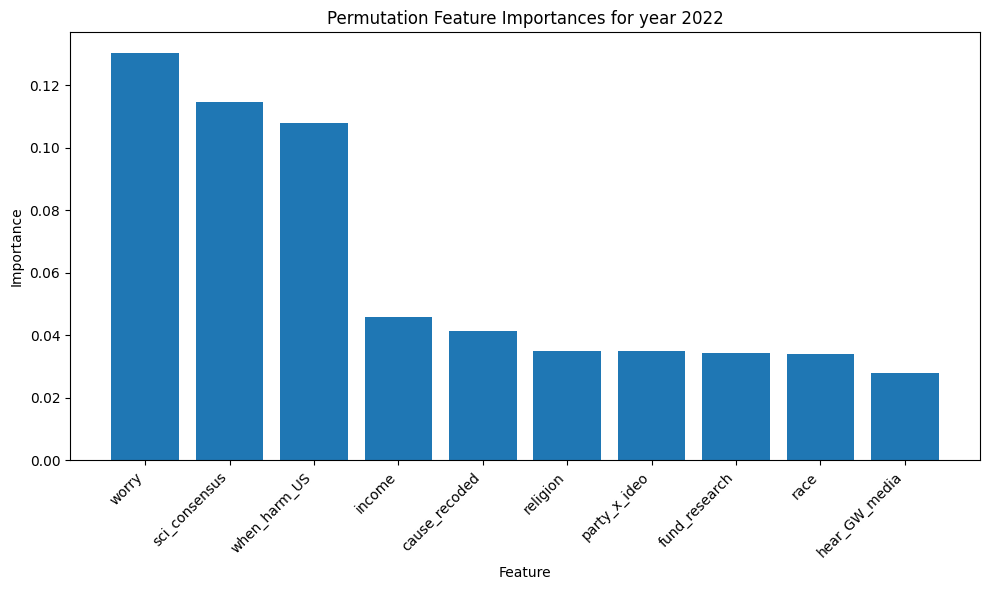

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


param_grid = { 
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
# Select relevant columns and split the data into features and target
target = 'happening'

# Loop through each year
for year in df['year'].unique():
    # Filter data for the current year
    subset = df[df['year'] == year]

    # Select features and target
    X = subset.drop(columns=['harm_personally', 'harm_US', 'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals','case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening','religion_other_nonchristian','cause_original', 'cause_other_text']).copy()
    y = subset[target].copy()
    # Apply weights based on 'weight_aggregate'
    sample_weights = subset['weight_aggregate']
    label_encoder = LabelEncoder()

    label_encoder.fit(y)

    # Transform both the training and testing data
    y = label_encoder.transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X, y, sample_weights, test_size=0.2, random_state=42
    )
    # Create a decision tree classifier
    model = XGBClassifier(random_state=42,max_depth=5,n_estimators=200,learning_rate=0.1,subsample=.8,enable_categorical=True)
    # Train the model using the training sets and weights
    model.fit(X_train, y_train, sample_weight=weights_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred, sample_weight=weights_test)
    print(f"Accuracy for year {year}: {accuracy * 100:.2f}%")
    


    # Display feature importances
    # Calculate permutation importances

    # Display feature importances
    feature_importance_df = pd.DataFrame({'Feature': model.feature_names_in_, 'Importance': model.feature_importances_})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Permutation Feature Importances for year {year}:\n{feature_importance_df.head(10)}\n")
    # Plot the top 10 features
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f"Permutation Feature Importances for year {year}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()


In [19]:
X=df.drop(columns=['harm_personally', 'harm_US', 'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals','case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening','religion_other_nonchristian','cause_original', 'cause_other_text']).copy()
y=df['happening']
sample_weights = df['weight_aggregate']

label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X, y, sample_weights, test_size=0.2, random_state=42
    )
    # Create a decision tree classifier
model = XGBClassifier(random_state=42,max_depth=5,n_estimators=200,learning_rate=0.1,subsample=.8,enable_category=True)
# Train the model using the training sets and weights
model.fit(X_train, y_train, sample_weight=weights_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred, sample_weight=weights_test)
print(f"Accuracy for year {year}: {accuracy * 100:.2f}%")



# Display feature importances
# Calculate permutation importances

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': model.feature_names_in_, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(f"Permutation Feature Importances for year {year}:\n{feature_importance_df.head(10)}\n")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:cause_recoded: category, sci_consensus: category, worry: category, when_harm_US: category, reg_CO2_pollutant: category, reg_utilities: category, fund_research: category, reg_coal_emissions: category, discuss_GW: category, hear_GW_media: category, gender: category, age_category: category, generation: category, educ: category, educ_category: category, income: category, income_category: category, race: category, ideology: category, party: category, party_w_leaners: category, party_x_ideo: category, registered_voter: category, region9: category, region4: category, religion: category, evangelical: category, service_attendance: category, marit_status: category, employment: category, house_head: category, house_type: category, house_own: category

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'harm_personally', 'harm_US', 'harm_dev_countries',
       'harm_future_gen',
       ...
       'house_head_Head of household', 'house_head_Not head of household',
       'house_type_Boat, RV, van, etc.',
       'house_type_Building with 2 or more apartments',
       'house_type_Mobile home',
       'house_type_One-family house attached to one or more houses (such as a condo or townhouse)',
       'house_type_One-family house detached from any other house',
       'house_own_Occupied without payment of rent',
       'house_own_Owned by you or someone in your household',
       'house_own_Rented'],
      dtype='object', length=2006)

In [22]:
df[['harm_personally', 'harm_US', 'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
            'reg_CO2_pollutant', 'reg_utilities', 'fund_research', 'reg_coal_emissions', 'discuss_GW',
            'hear_GW_media', 'gender', 'age_category', 'generation', 'educ_category', 'income_category',
            'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo', 'registered_voter', 'region9',
            'region4', 'religion', 'religion_other_nonchristian', 'evangelical', 'service_attendance',
            'marit_status', 'employment', 'house_head', 'house_size', 'house_ages0to1', 'house_ages2to5',
            'house_ages6to12', 'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own']]

,harm_personally,harm_US,harm_dev_countries,harm_future_gen,harm_plants_animals,reg_CO2_pollutant,reg_utilities,fund_research,reg_coal_emissions,discuss_GW,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,Only a little,A moderate amount,A great deal,A great deal,A great deal,Strongly support,Strongly support,Strongly support,NaN,Occasionally,...,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,Only a little,Refused,Only a little,A moderate amount,A moderate amount,Somewhat support,Somewhat support,Somewhat support,NaN,Rarely,...,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,Not at all,Not at all,Not at all,Not at all,Not at all,Somewhat oppose,Strongly oppose,Strongly oppose,NaN,Never,...,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,Only a little,Only a little,A moderate amount,A moderate amount,A moderate amount,Somewhat support,Strongly support,Strongly support,NaN,Rarely,...,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,Don't know,Don't know,Don't know,Don't know,A moderate amount,Somewhat support,Strongly oppose,Strongly support,NaN,Never,...,Working - as a paid employee,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30131,A moderate amount,A great deal,A great deal,A great deal,A great deal,Somewhat support,NaN,Strongly support,NaN,Rarely,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
30132,A moderate amount,Only a little,Only a little,Only a little,Only a little,Strongly oppose,NaN,Somewhat support,NaN,Never,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
30133,A moderate amount,A great deal,A great deal,A great deal,A great deal,Strongly support,NaN,Strongly support,NaN,Never,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,Rented
30134,Not at all,Only a little,Not at all,Not at all,A moderate amount,Strongly oppose,NaN,Strongly oppose,NaN,Rarely,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,Owned by you or someone in your household


In [24]:
df[df['year']=='2021'].head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
27075,48001.0,Mar 2021,2021,0.5832,0.607664,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
27076,48002.0,Mar 2021,2021,0.7256,0.756037,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,Owned by you or someone in your household
27077,48003.0,Mar 2021,2021,0.7308,0.761456,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Don't know enough to say,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Owned by you or someone in your household
27078,48004.0,Mar 2021,2021,0.5975,0.622564,No,None of the above because global warming isn't...,,Neither because global warming isn't happening,There is a lot of disagreement among scientist...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household
27079,48005.0,Mar 2021,2021,0.6942,0.723320,No,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is not ha...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,Owned by you or someone in your household


In [25]:
data_types = df[df['year']=='2021'].dtypes

# Identify columns with string values
string_columns = data_types[data_types == 'object'].index.tolist()

# Identify columns with float values
float_columns = data_types[data_types == 'float64'].index.tolist()

print("Columns with string values:", string_columns)
print("Columns with float values:", float_columns)

Columns with string values: ['cause_other_text', 'religion_other_nonchristian']
Columns with float values: ['case_ID', 'weight_wave', 'weight_aggregate', 'age', 'house_size', 'house_ages0to1', 'house_ages2to5', 'house_ages6to12', 'house_ages13to17', 'house_ages18plus']


In [28]:
df[df['year']=='2021']['evangelical'].dtype

CategoricalDtype(categories=[98.0, 'Don't Know', 'No', 'Refused', 'Yes'], ordered=False, categories_dtype=object)